# Introduction to LangGraph

## Handling multiple *keys* in *Graph State* in multiple *Graph Nodes*
Now I know that the *Graph State* can have multiple *keys* and that enables a lots flexibility to build very *Graphs* which can carry out very complex tasks. I want to see the use of same *multiple keys* in the *Graph State* with a *graph* with *multiple nodes*. That's going to be even more fun!!!

Let me take the same example as previous. But this time, let me break the complete process into multiple nodes as below. 
+ first node, asks my name
+ second node, collects the values of numbers from me
+ third node, calculates the sum of the values and provide me the final answer

To make it clear to me, let me list down all the steps which I need to follow. 
+ Import the required modules
+ Define the `AgentState`
+ Define the *node functions*. I have three *nodes* in the planned *graph
+ Create an instance of `StateGraph`
+ Add the nodes
+ Connect the nodes
+ Set the entry point and finish points of the graph. 
+ Build the Graph
+ Run the Graph

Let me start to build this now. 

In [1]:
# import the modules
from typing import TypedDict, List 
from langgraph.graph import StateGraph 
from IPython.display import Image, display

In [2]:
# Define the AgentState
# Add Code Here to defint the Graph State
class AgentState(TypedDict):
    name: str
    values: List[int]
    result: int

In [4]:
# Define the node functions 
def ask_name(state: AgentState) -> AgentState:
    state['name'] = input("What is your name? ")
    return state
def ask_values(state: AgentState) -> AgentState:
    values_input = input("Enter a list of integers separated by commas: ")
    state['values'] = [int(x.strip()) for x in values_input.split(',')]
    return state
def calculate_sum(state: AgentState) -> AgentState:
    state['result'] = sum(state['values'])
    return state
def display_result(state: AgentState) -> AgentState:
    print(f"{state['name']}, the sum of your values is: {state['result']}")
    return state

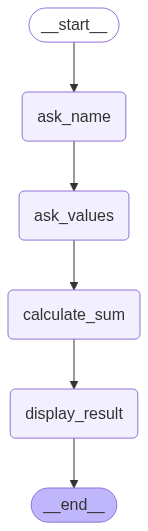

In [7]:
# Build the Graph and visualize it
graph = StateGraph(AgentState)
graph.add_node("ask_name", ask_name)
graph.add_node("ask_values", ask_values)
graph.add_node("calculate_sum", calculate_sum)
graph.add_node("display_result", display_result)
graph.set_entry_point("ask_name")
graph.set_finish_point("display_result")

graph.add_edge("ask_name", "ask_values")
graph.add_edge("ask_values", "calculate_sum")
graph.add_edge("calculate_sum", "display_result")
# Compile the graph to create the application

app = graph.compile()
# Visualize the graph
display(Image(app.get_graph().draw_mermaid_png()))  

In [8]:
# Run the Graph
answer = app.invoke({})

eranga, the sum of your values is: 10


In [10]:
# Print the final answer
print("Final Answer:", answer)  

Final Answer: {'name': 'eranga', 'values': [1, 2, 3, 4], 'result': 10}
